In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wavelength_dependent_PSF_grism_sim as PSF_Grism

from grizli.model import GrismFLT
import os

/Users/keith/miniconda3/envs/grizli-env/lib/python3.12/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Users/keith/PYSYN_CDBS/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/Users/keith/miniconda3/envs/grizli-env/lib/python3.12/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Users/keith/PYSYN_CDBS/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '
**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-065 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-068
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


In [2]:
empty_fits_dir = "/Users/keith/astr/research_astr/roman_grism_sim/ultra_smooth_lambda_dependent/fits"
spectrum_file = "/Users/keith/astr/research_astr/FOV0/FOV0_SEDs/ukg0v.dat"
bandpass_file = "/Users/keith/astr/research_astr/FOV0/FOV0_SEDs/wfirst_wfi_f158_001_syn.fits"

empty_direct = os.path.join(empty_fits_dir, "empty_direct.fits")
empty_seg = os.path.join(empty_fits_dir, "empty_seg.fits")

# Consider how to incorporate this later (considering the pad and placeholder variables)
# roman = GrismFLT(direct_file=empty_direct, seg_file=empty_seg, pad=100)

args = PSF_Grism.create_objects_for_disperse_function(empty_fits_dir=empty_fits_dir, 
                                                      spectrum_file=spectrum_file, 
                                                      bandpass_file=bandpass_file,
                                                      detector_position=(0,0))


roman_sim, list_of_dispersions = PSF_Grism.disperse_one_star(**args)



Image cutout: x=slice(0, 4088, None), y=slice(0, 4088, None) [Out of range]
/Users/keith/astr/research_astr/roman_grism_sim/ultra_smooth_lambda_dependent/fits/empty_direct.fits / Pad ref HDU with 464 pixels
/Users/keith/astr/research_astr/roman_grism_sim/ultra_smooth_lambda_dependent/fits/empty_direct.fits / blot segmentation /Users/keith/astr/research_astr/roman_grism_sim/ultra_smooth_lambda_dependent/fits/empty_seg.fits[0]
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol
Using default C-based coordinate transformation...
U

Attempted to get aberrations at field point (0, 0) which is outside the range of the reference data; approximating to nearest interpolated point (0.0, 37.0)
Attempted to get aberrations at field point (0, 0) which is outside the range of the reference data; approximating to nearest interpolated point (0.0, 37.0)
Attempted to get aberrations at field point (0, 0) which is outside the range of the reference data; approximating to nearest interpolated point (0.0, 37.0)
Attempted to get aberrations at field point (0, 0) which is outside the range of the reference data; approximating to nearest interpolated point (0.0, 37.0)
Attempted to get aberrations at field point (0, 0) which is outside the range of the reference data; approximating to nearest interpolated point (0.0, 37.0)
Attempted to get aberrations at field point (0, 0) which is outside the range of the reference data; approximating to nearest interpolated point (0.0, 37.0)
Attempted to get aberrations at field point (0, 0) which i

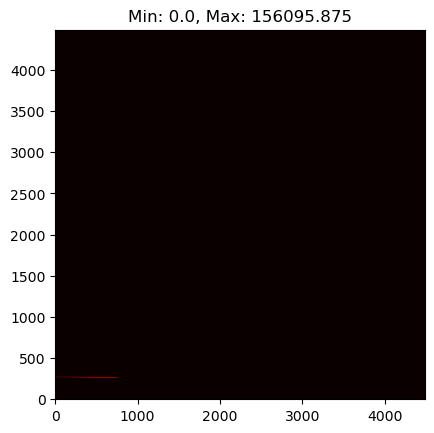

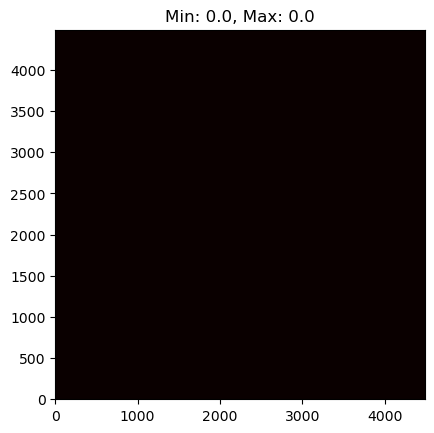

In [3]:
test_full = np.zeros_like(list_of_dispersions[0])
for ii in range(len(list_of_dispersions)):
    test_full += list_of_dispersions[ii]
plt.imshow(test_full, origin='lower', cmap='hot')
plt.title(f"Min: {test_full.min()}, Max: {test_full.max()}")
plt.show()

diff = test_full - roman_sim.model
plt.imshow(diff, origin="lower", cmap='hot')
plt.title(f"Min: {diff.min()}, Max: {diff.max()}")
plt.show()

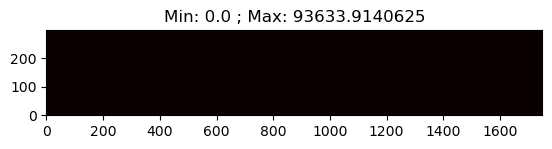

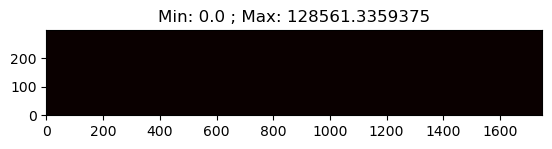

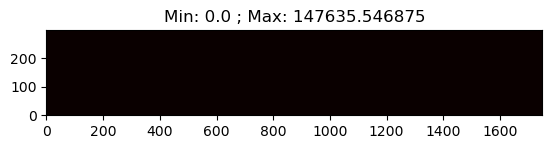

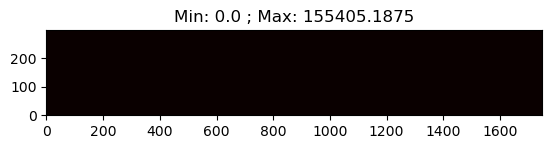

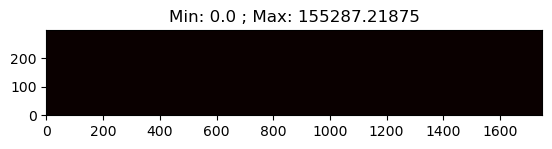

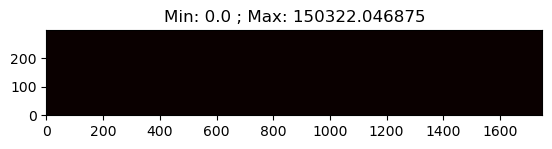

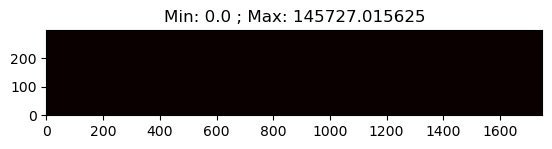

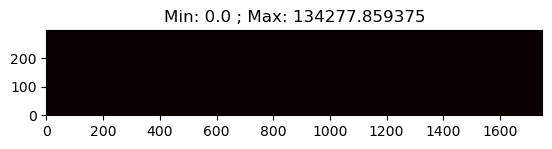

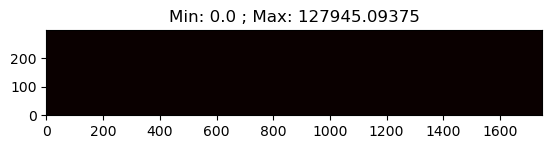

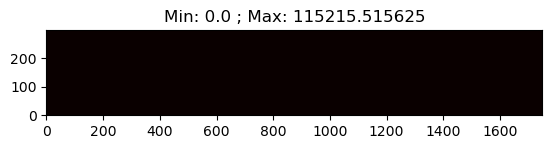

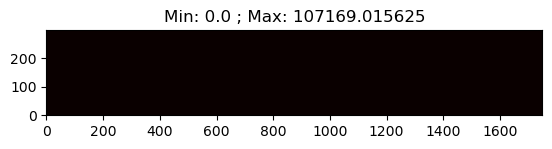

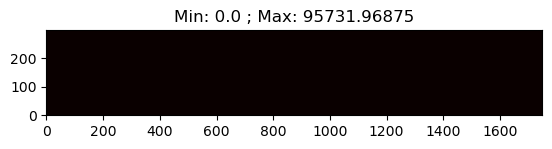

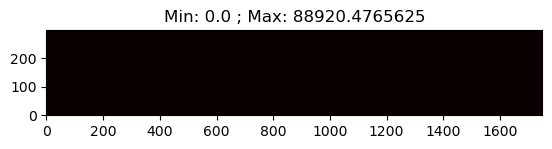

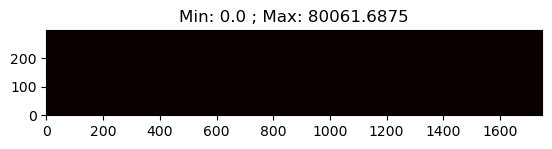

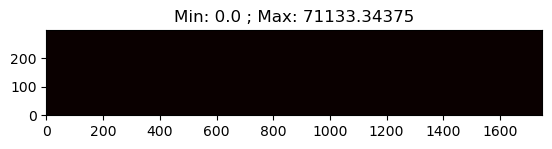

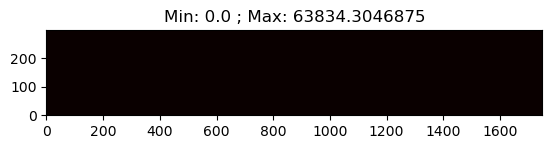

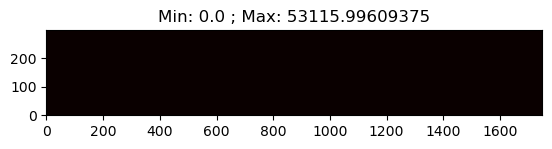

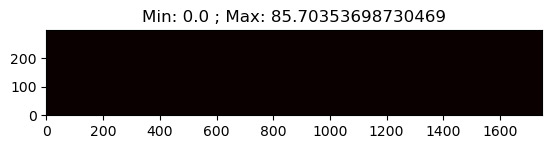

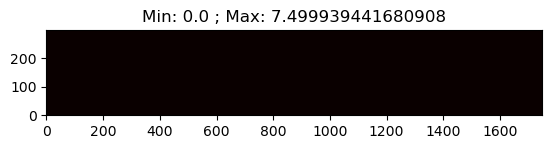

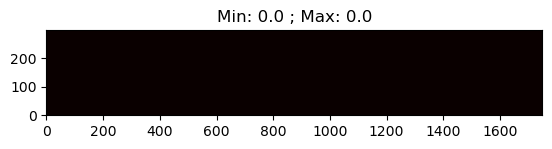

In [4]:
for ii in range(len(list_of_dispersions)):
    plt.imshow(list_of_dispersions[ii][2000:2300, 1250:3000], origin="lower", cmap="hot")
    plt.title(f"Min: {list_of_dispersions[ii].min()} ; Max: {list_of_dispersions[ii].max()}")
    plt.show()

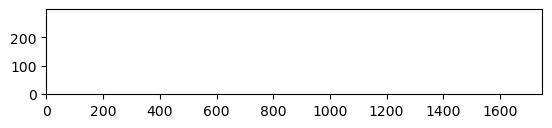

In [5]:
plt.imshow(np.log(roman_sim.model[2000:2300, 1250:3000]), vmin=0, vmax=24, origin="lower", cmap="hot")

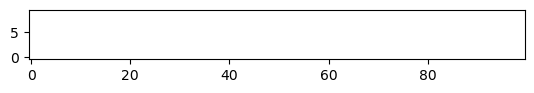

In [6]:
plt.imshow(np.log(roman_sim.model[2200:2210, 2600:2700]), vmin=0, vmax=20, origin="lower", cmap="hot")